In [8]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load dataset
# No header
# Columns are x,y,sigma,last
df = pd.read_csv("data.txt", header=None, names=["x", "y", "sigma", "last"])
df

,x,y,sigma,last
0,84,-8,8,0
1,11,38,4,0
2,37,19,4,0
3,13,33,6,0
4,40,28,7,0
...,...,...,...,...
1357,58,402,6,0
1358,35,228,3,0
1359,19,190,6,0
1360,78,606,4,0


In [3]:
# Get row indices where last == 1
last_indices = df.index[df["last"] == 1].tolist()

# Increment indices by 1 so the last row of each event is included in that event
last_indices = [i + 1 for i in last_indices]

# Add index 0 to the beginning of the list
last_indices.insert(0, 0)

# Slice df into events
events = [df.iloc[last_indices[i]:last_indices[i + 1]] for i in range(len(last_indices) - 1)]

# Print number of observations in each event
for i, event in enumerate(events):
    print(f"Event {i}: {len(event)} observations")

Event 0: 100 observations
Event 1: 94 observations
Event 2: 242 observations
Event 3: 242 observations
Event 4: 242 observations
Event 5: 442 observations


In [23]:
# Manual chi-squared calculation
for i, event in enumerate(events):
    n = len(event)
    
    S = (1 / (event["sigma"] * event["sigma"])).sum()
    Sx = (event["x"] / (event["sigma"] * event["sigma"])).sum()
    Sy = (event["y"] / (event["sigma"] * event["sigma"])).sum()
    
    t = (1 / event["sigma"]) * (event["x"] - (Sx / S))
    Stt = (t * t).sum()
    
    b = (1 / Stt) * (t * event["y"] / event["sigma"]).sum()
    a = (Sy - Sx * b) / S
    
    sigmaA = (1 + (Sx ** 2) / (S * Stt)) / S
    sigmaB = 1 / Stt
    
    sumTerm = (event["y"] - a - (b * event["x"])) / event["sigma"]
    chiSquaredNdof = (sumTerm ** 2).sum() / (n - 2)
    
    print(f"Event {i + 1}:")
    print(f"               n: {n}")
    print(f"               S: {S}")
    print(f"              Sx: {Sx}")
    print(f"              Sy: {Sy}")
    print(f"             Stt: {Stt}")
    print(f"               a: {a}")
    print(f"               b: {b}")
    print(f"          sigmaA: {sigmaA}")
    print(f"          sigmaB: {sigmaB}")
    print(f"  chiSquaredNdof: {chiSquaredNdof}")
    print()

Event 1:
               n: 100
               S: 18.950655706727137
              Sx: 990.3300825144873
              Sy: 260.2829098954397
             Stt: 19130.780665730083
               a: 40.17698976722963
               b: -0.5059902747210527
          sigmaA: 0.19551949387697345
          sigmaB: 5.2271782185624533e-05
  chiSquaredNdof: 1.4297422694779696

Event 2:
               n: 94
               S: 19.407040028974553
              Sx: 950.7853313177122
              Sy: -846.6072182854624
             Stt: 12913.203160244733
               a: 119.02168732875383
               b: -3.3198512478269646
          sigmaA: 0.2373990024722776
          sigmaB: 7.744011982082437e-05
  chiSquaredNdof: 21.426859380006935

Event 3:
               n: 242
               S: 9.576458739859916
              Sx: 502.3152163330909
              Sy: 1123.1993930448552
             Stt: 9319.323469008541
               a: 58.99386245647228
               b: 1.1113481837175674
          sigmaA

In [13]:
# Scipy chi-squared calculation
for event in events:
    result = sp.stats.linregress(event["x"], event["y"])
    print(result)
    

LinregressResult(slope=-0.5643434954428, intercept=42.4710223122638, rvalue=-0.9358109012426256, pvalue=3.591726069024302e-46, stderr=0.02147358178282756, intercept_stderr=1.2813971968184767)
LinregressResult(slope=-3.3950822962320206, intercept=122.42399723929802, rvalue=-0.9920809735082536, pvalue=1.0697170406398822e-84, stderr=0.04481244740712398, intercept_stderr=2.667235838042325)
LinregressResult(slope=1.1050609410230166, intercept=60.54629227203024, rvalue=0.9477091238122141, pvalue=4.880966608604239e-121, stderr=0.024020417689971364, intercept_stderr=1.3697731512178937)
LinregressResult(slope=-1.288404051936689, intercept=0.9966476774709747, rvalue=-0.9977832087084196, pvalue=1.8412709936091792e-284, stderr=0.0055468555044825025, intercept_stderr=0.31109710978573274)
LinregressResult(slope=10.981780288430247, intercept=12.933074987596683, rvalue=0.995116701517465, pvalue=2.2661014621809708e-243, stderr=0.07031272051191764, intercept_stderr=3.9252252890016988)
LinregressResult(s

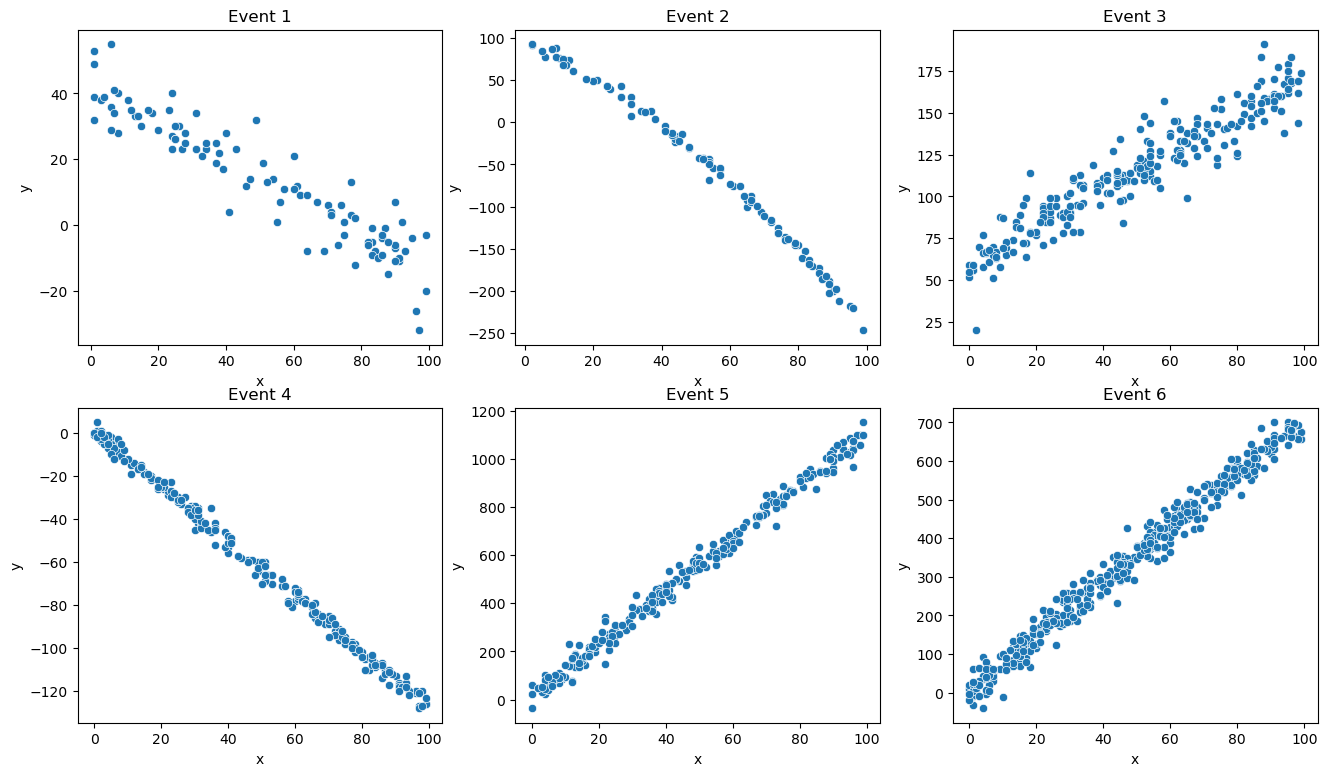

In [6]:
# Plot events as grid of scatter plots
plt.figure(figsize=(16, 9))
for i, event in enumerate(events):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(data=event, x="x", y="y")
    plt.title("Event " + str(i + 1))